In [1]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression

In [2]:
#read dataset.
df_merchant_category = pd.read_csv('dataset/merchant_category_mapping.csv')
df_merchant_name = pd.read_csv('dataset/merchant_name_mapping.csv')
df_performance = pd.read_csv('dataset/performance_dataset.csv')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
#merge all dataset on merchant_id.
df_temp = pd.merge(df_merchant_category,df_merchant_name, on = 'merchant_id')
df_all = pd.merge(df_temp, df_performance, on =  'merchant_id')
#clean the dataset to make sure strings are clean.
df_all['category'] = df_all['category'].str.strip()
df_all['subcategory'] = df_all['subcategory'].str.strip()
df_all['name'] = df_all['name'].str.strip()
df_all.head(5)

,category,subcategory,merchant_id,name,actual_repayment_pct,predicted_repayment_pct,num_trxn,avg_auth_amt,avg_loan_amt,avg_fico,avg_term,avg_apr
0,WOMENS_FASHION,Women's Clothing Stores - 448120,78986,MYRIFGH,0.927466,0.948425,6331,491.650278,473.727737,643,8,0.251198
1,HOME_FURNISHINGS,Furniture Stores - 442110,54871,ZNCIWJS,0.983798,0.978641,3293,862.996710,862.555109,715,6,0.000000
2,NaN,Women's Clothing Stores - 448120,86469,LYMLCLF,0.936782,0.965042,2670,636.689936,620.229734,664,8,0.214657
3,OTHER,Musical Instrument and Supplies Stores - 451140,42719,ZBCRDNS,0.961743,0.945634,570,719.714054,692.877934,655,10,0.257577
4,JEWELRY,Jewelry Stores - 448310,40242,YOZQTHS,0.867273,0.902408,317,380.978427,374.832065,626,9,0.160714


# What would you say drives the variance between actual and predicted repayment?

In [3]:
#create dataset for question1, getting repayment difference.
df_1 = df_all.iloc[:,0:df_all.shape[1]]
df_1['repay_diff'] = df_1['actual_repayment_pct']-df_1['predicted_repayment_pct']
df_1['repay_abs_diff'] = df_1['repay_diff'].abs()
#look at the correlationi of avg_auth_amt and avg_loan_amt.(they are highly correlated)
df_1[['avg_auth_amt','avg_loan_amt']].corr()

,avg_auth_amt,avg_loan_amt
avg_auth_amt,1.000000,0.980431
avg_loan_amt,0.980431,1.000000


In [4]:
# get an idea what makes the difference large
df_1.sort_values(by = 'repay_diff').head(6)

,category,subcategory,merchant_id,name,actual_repayment_pct,predicted_repayment_pct,num_trxn,avg_auth_amt,avg_loan_amt,avg_fico,avg_term,avg_apr,repay_diff,repay_abs_diff
140,OTHER,All Other Health and Personal Care Stores - 44...,58894,XWUULOE,0.000000,0.950731,1,79.840000,79.840000,611,3,0.250,-0.950731,0.950731
134,OTHER,NaN,45593,PIYXFMT,0.000000,0.932420,1,823.333333,823.333333,634,12,0.250,-0.932420,0.932420
111,OTHER,All Other Health and Personal Care Stores - 44...,44063,DTKZXJU,0.268592,0.904726,2,288.390000,288.390000,674,8,0.224,-0.636135,0.636135
88,OTHER,Wireless Telecommunications Carriers (except S...,42733,UCXMYZC,0.307185,0.792512,5,220.324444,216.992222,598,9,0.300,-0.485327,0.485327
118,OTHER,Sporting Goods Stores - 451110,81395,MJTPQEF,0.500000,0.953412,2,1232.500000,1207.916666,674,11,0.250,-0.453412,0.453412
113,OTHER,All Other Health and Personal Care Stores - 44...,59155,WJHKYQC,0.269380,0.707895,2,163.445555,162.671111,644,8,0.230,-0.438515,0.438515


In [5]:
#to make graph 'num_txrn' looks clearer, 3 extreme cases are dropped
df_temp = df_1[df_1['num_trxn']<=1000]

Text(0.5,1,'avg_apr')

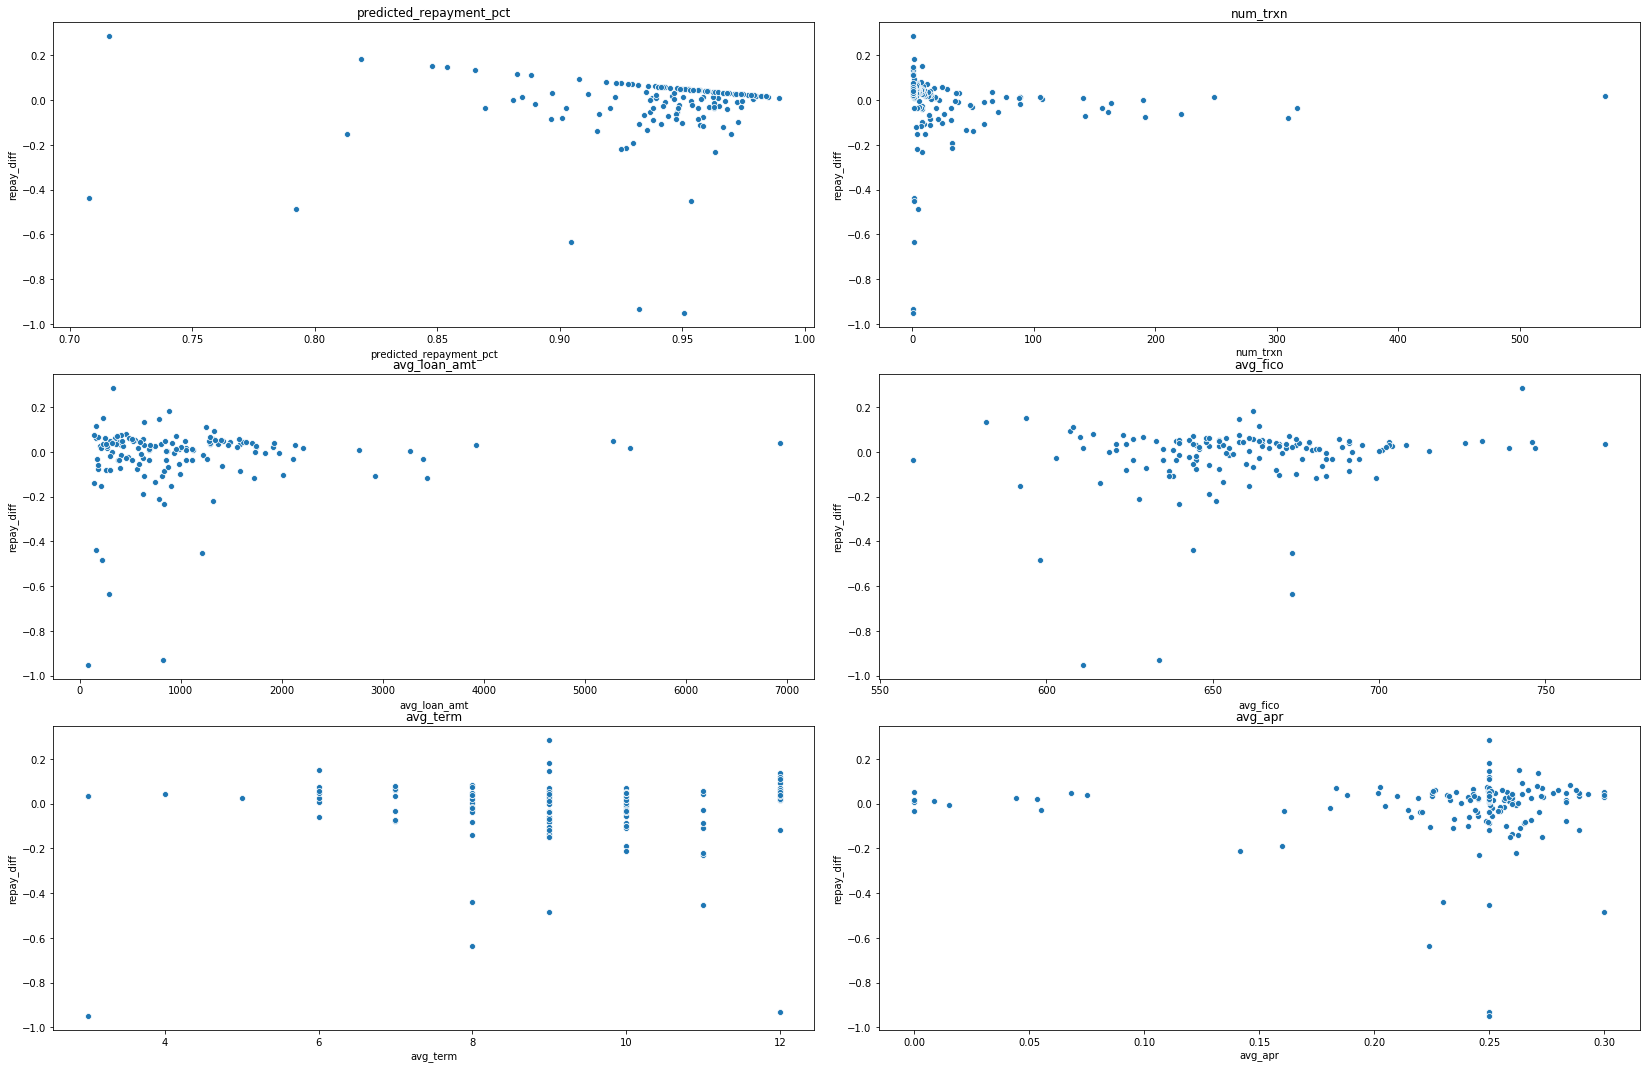

In [6]:
#plot the predicted and actual difference with respect to other reasonable features.
fig, axs = plt.subplots(3,2,figsize=(15, 10))
fig.tight_layout()
plt.subplots_adjust(bottom=0.1, right=1.5, top=1.5)
sns.scatterplot(x = 'predicted_repayment_pct', y = 'repay_diff', data = df_1, ax=axs[0,0]).set_title('predicted_repayment_pct')
sns.scatterplot(x = 'num_trxn', y = 'repay_diff', data = df_temp, ax=axs[0,1]).set_title('num_trxn')
sns.scatterplot(x = 'avg_loan_amt', y = 'repay_diff', data = df_1, ax=axs[1,0]).set_title('avg_loan_amt')
sns.scatterplot(x = 'avg_fico', y = 'repay_diff', data = df_1, ax=axs[1,1]).set_title('avg_fico')
sns.scatterplot(x = 'avg_term', y = 'repay_diff', data = df_1, ax=axs[2,0]).set_title('avg_term')
sns.scatterplot(x = 'avg_apr', y = 'repay_diff', data = df_1, ax=axs[2,1]).set_title('avg_apr')

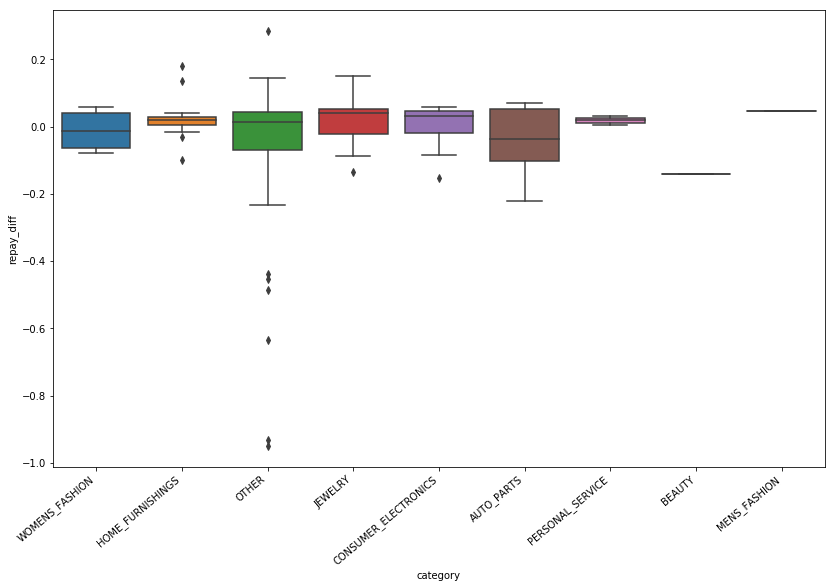

In [7]:
#boxplot with category.
fig, ax = plt.subplots(figsize=(11.7, 8.27))
ax = sns.boxplot(x = 'category',y = 'repay_diff', data = df_1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

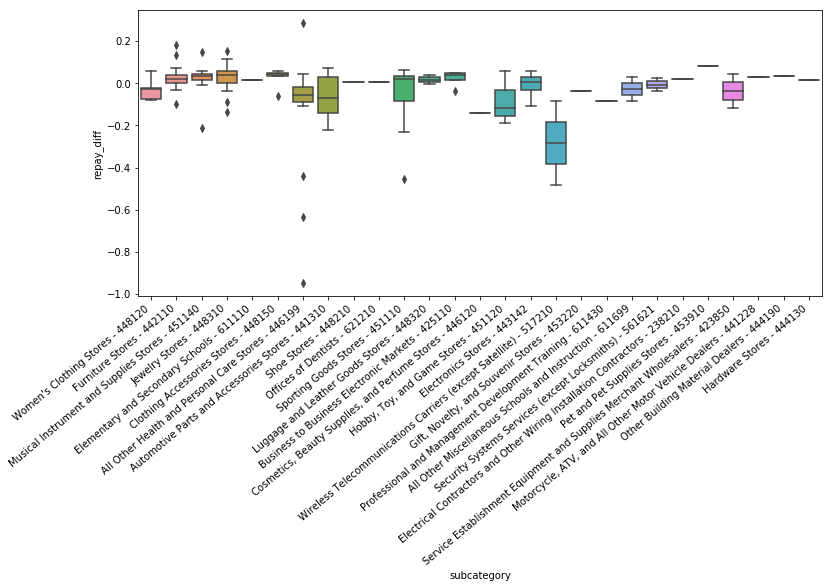

In [8]:
#boxplot with subcategory
fig, ax = plt.subplots(figsize=(11.7, 8.27))
ax = sns.boxplot(x = 'subcategory', y = 'repay_diff', data = df_1)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

In [23]:
#to further evaluate whether some features are affacting the repayment rate using OLS and random forrest. It turns out
#loan_amt, avg_fico and num_trxn are the three most important feature.

df_1_1 = pd.get_dummies(df_1,columns=['subcategory'])
indicator_repay = [1 if df_1.iloc[i,12] >= 0 else 0 for i in range(df_1.shape[0])]
#df_1_1['repay_abs_diff'] = indicator_repay
drops = ['category','name','repay_abs_diff','actual_repayment_pct','predicted_repayment_pct','merchant_id','avg_auth_amt']
df_1_1 = df_1_1.drop(columns = drops) 

y = df_1['repay_abs_diff']
X = df_1_1.drop(columns=['repay_diff'])
X = sm.add_constant(X)
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         repay_abs_diff   R-squared:                       0.214
Model:                            OLS   Adj. R-squared:                 -0.015
Method:                 Least Squares   F-statistic:                    0.9344
Date:                Wed, 10 Jul 2019   Prob (F-statistic):              0.573
Time:                        13:09:05   Log-Likelihood:                 99.660
No. Observations:                 143   AIC:                            -133.3
Df Residuals:                     110   BIC:                            -35.55
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
==========================================================================================================================================================
                                                                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                      0.6373      0.315      2.026      0.045       0.014       1.261
num_trxn                                                                               -1.479e-05   2.21e-05     -0.668      0.506   -5.87e-05    2.91e-05
avg_loan_amt                                                                           -3.838e-06   1.56e-05     -0.246      0.806   -3.47e-05     2.7e-05
avg_fico                                                                                  -0.0006      0.000     -1.406      0.163      -0.002       0.000
avg_term                                                                                  -0.0044      0.007     -0.587      0.559      -0.019       0.010
avg_apr                                                                                    0.0019      0.201      0.010      0.992      -0.397       0.400
subcategory_All Other Health and Personal Care Stores - 446199                             0.0081      0.065      0.125      0.901      -0.121       0.137
subcategory_All Other Miscellaneous Schools and Instruction - 611699                      -0.0960      0.112     -0.854      0.395      -0.319       0.127
subcategory_Automotive Parts and Accessories Stores - 441310                              -0.0767      0.077     -0.995      0.322      -0.229       0.076
subcategory_Business to Business Electronic Markets - 425110                              -0.1376      0.088     -1.570      0.119      -0.311       0.036
subcategory_Clothing Accessories Stores - 448150                                          -0.1419      0.079     -1.807      0.073      -0.298       0.014
subcategory_Cosmetics, Beauty Supplies, and Perfume Stores - 446120                       -0.0766      0.148     -0.516      0.607      -0.370       0.217
subcategory_Electrical Contractors and Other Wiring Installation Contractors - 238210     -0.1667      0.148     -1.123      0.264      -0.461       0.127
subcategory_Electronics Stores - 443142                                                   -0.1415      0.073     -1.950      0.054      -0.285       0.002
subcategory_Elementary and Secondary Schools - 611110                                     -0.1962      0.148     -1.326      0.188      -0.489       0.097
subcategory_Furniture Stores - 442110                                                     -0.1223      0.064     -1.911      0.059      -0.249       0.005
subcategory_Gift, Novelty, and Souvenir Stores - 453220                                   -0.1253      0.149     -0.842      0.402      -0

In [24]:
model_rf = RandomForestRegressor(max_depth = 3, random_state=0,n_estimators=100)
model_rf.fit(X,y)
#print(model_rf.feature_importances_)
print('Importance of num_trxn is: %.3f'%(model_rf.feature_importances_[1]))
print('Importance of avg_loan_amt is: %.3f'%(model_rf.feature_importances_[2]))
print('Importance of avg_fico is: %.3f'%(model_rf.feature_importances_[3]))

Importance of num_trxn is: 0.112
Importance of avg_loan_amt is: 0.431
Importance of avg_fico is: 0.128


# What could drive the difference between auth_amount and loan_amount?
In this question I looked both in difference and percentage difference, the results I got are close to each other.

In [10]:

#create dataset for question 2 with difference and relative difference
df_2 = df_all.iloc[:,0:df_all.shape[1]]
df_2['amt_diff'] = df_2['avg_loan_amt']-df_2['avg_auth_amt']
df_2['percentage_diff'] = (df_2['avg_loan_amt']-df_2['avg_auth_amt'])/df_2['avg_auth_amt']
df_2[['avg_auth_amt','avg_loan_amt']].corr()

,avg_auth_amt,avg_loan_amt
avg_auth_amt,1.000000,0.980431
avg_loan_amt,0.980431,1.000000


In [11]:
#get an intuitive idea.
df_2.sort_values(by='amt_diff')[['subcategory','amt_diff',]].head(6)

,subcategory,amt_diff
137,Jewelry Stores - 448310,-2132.500000
117,Jewelry Stores - 448310,-1745.000000
116,Jewelry Stores - 448310,-595.715000
109,Jewelry Stores - 448310,-549.237500
85,Jewelry Stores - 448310,-467.135714
82,Jewelry Stores - 448310,-434.250000


In [12]:
#to make graph 'num_txrn' looks clearer, 3 extreme cases are dropped
df_temp2 = df_2[df_2['num_trxn']<=1000]

Text(0.5,1,'avg_apr')

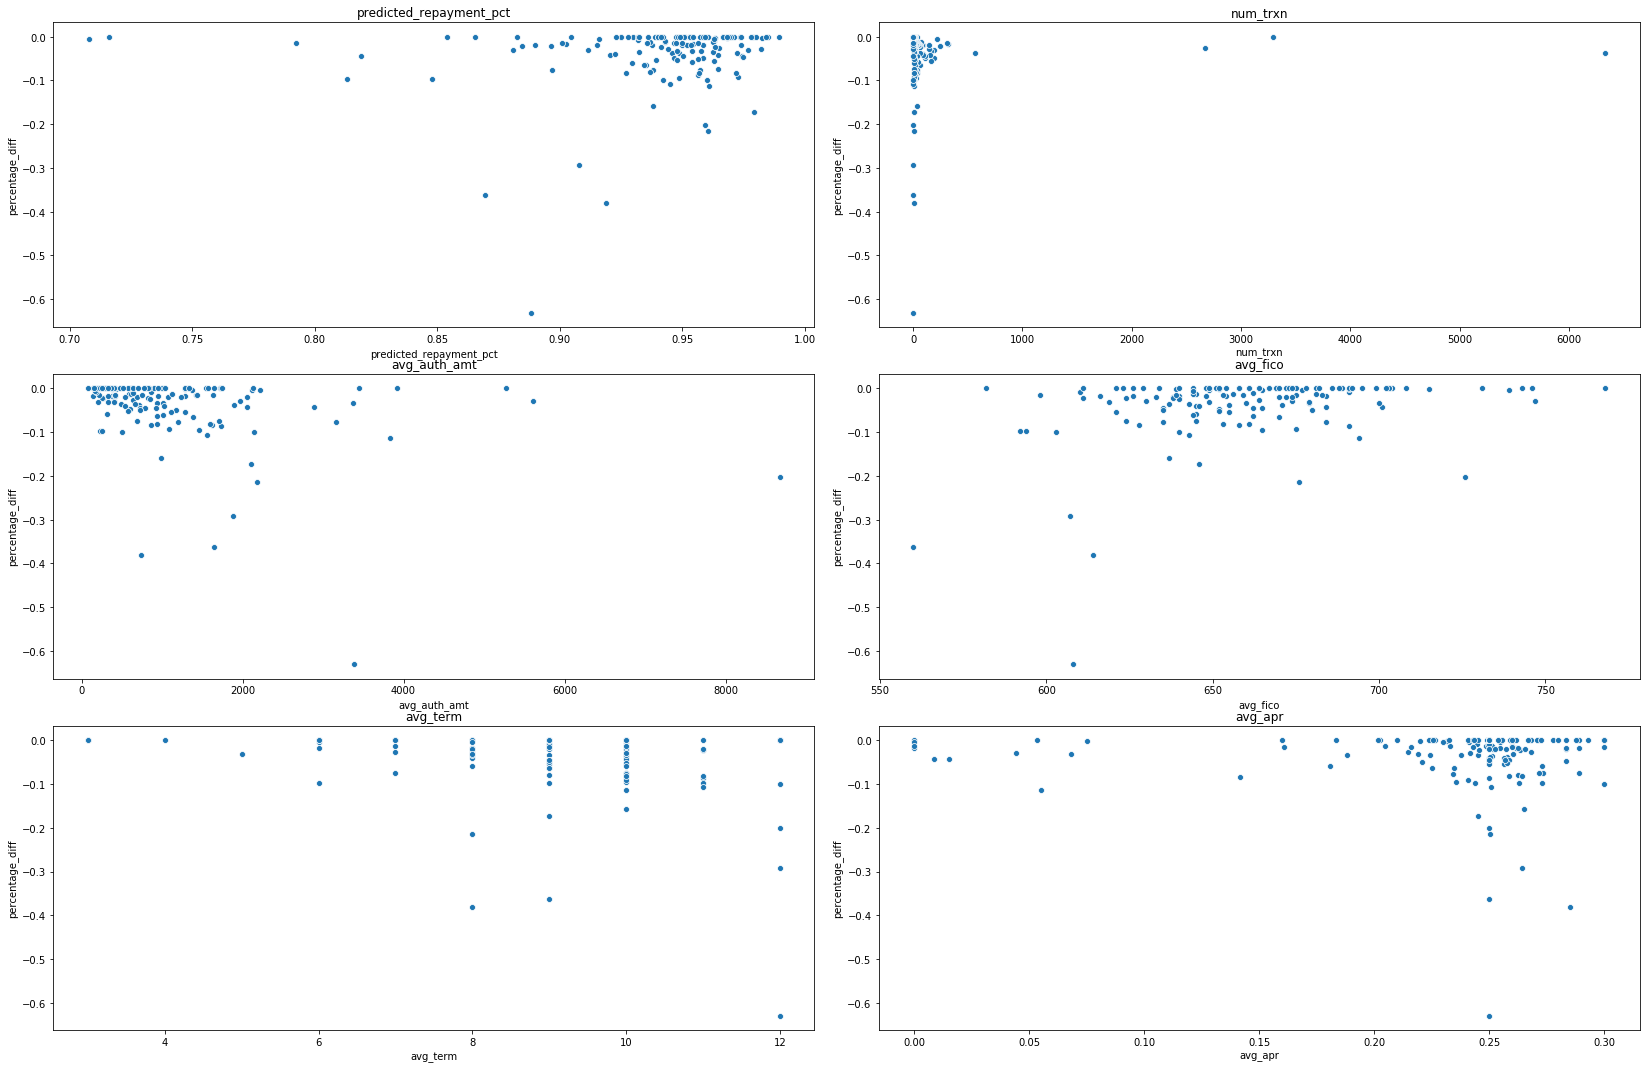

In [13]:
#percentage difference
#auth_amt and loan_amt difference in percentage of the auth_amt.
fig, axs = plt.subplots(3,2,figsize=(15, 10))
fig.tight_layout()
plt.subplots_adjust(bottom=0.1, right=1.5, top=1.5)
sns.scatterplot(x = 'predicted_repayment_pct', y = 'percentage_diff', data = df_2, ax=axs[0,0]).set_title('predicted_repayment_pct')
sns.scatterplot(x = 'num_trxn', y = 'percentage_diff', data = df_2, ax=axs[0,1]).set_title('num_trxn')
sns.scatterplot(x = 'avg_auth_amt', y = 'percentage_diff', data = df_2, ax=axs[1,0]).set_title('avg_auth_amt')
sns.scatterplot(x = 'avg_fico', y = 'percentage_diff', data = df_2, ax=axs[1,1]).set_title('avg_fico')
sns.scatterplot(x = 'avg_term', y = 'percentage_diff', data = df_2, ax=axs[2,0]).set_title('avg_term')
sns.scatterplot(x = 'avg_apr', y = 'percentage_diff', data = df_2, ax=axs[2,1]).set_title('avg_apr')

Text(0.5,1,'avg_apr')

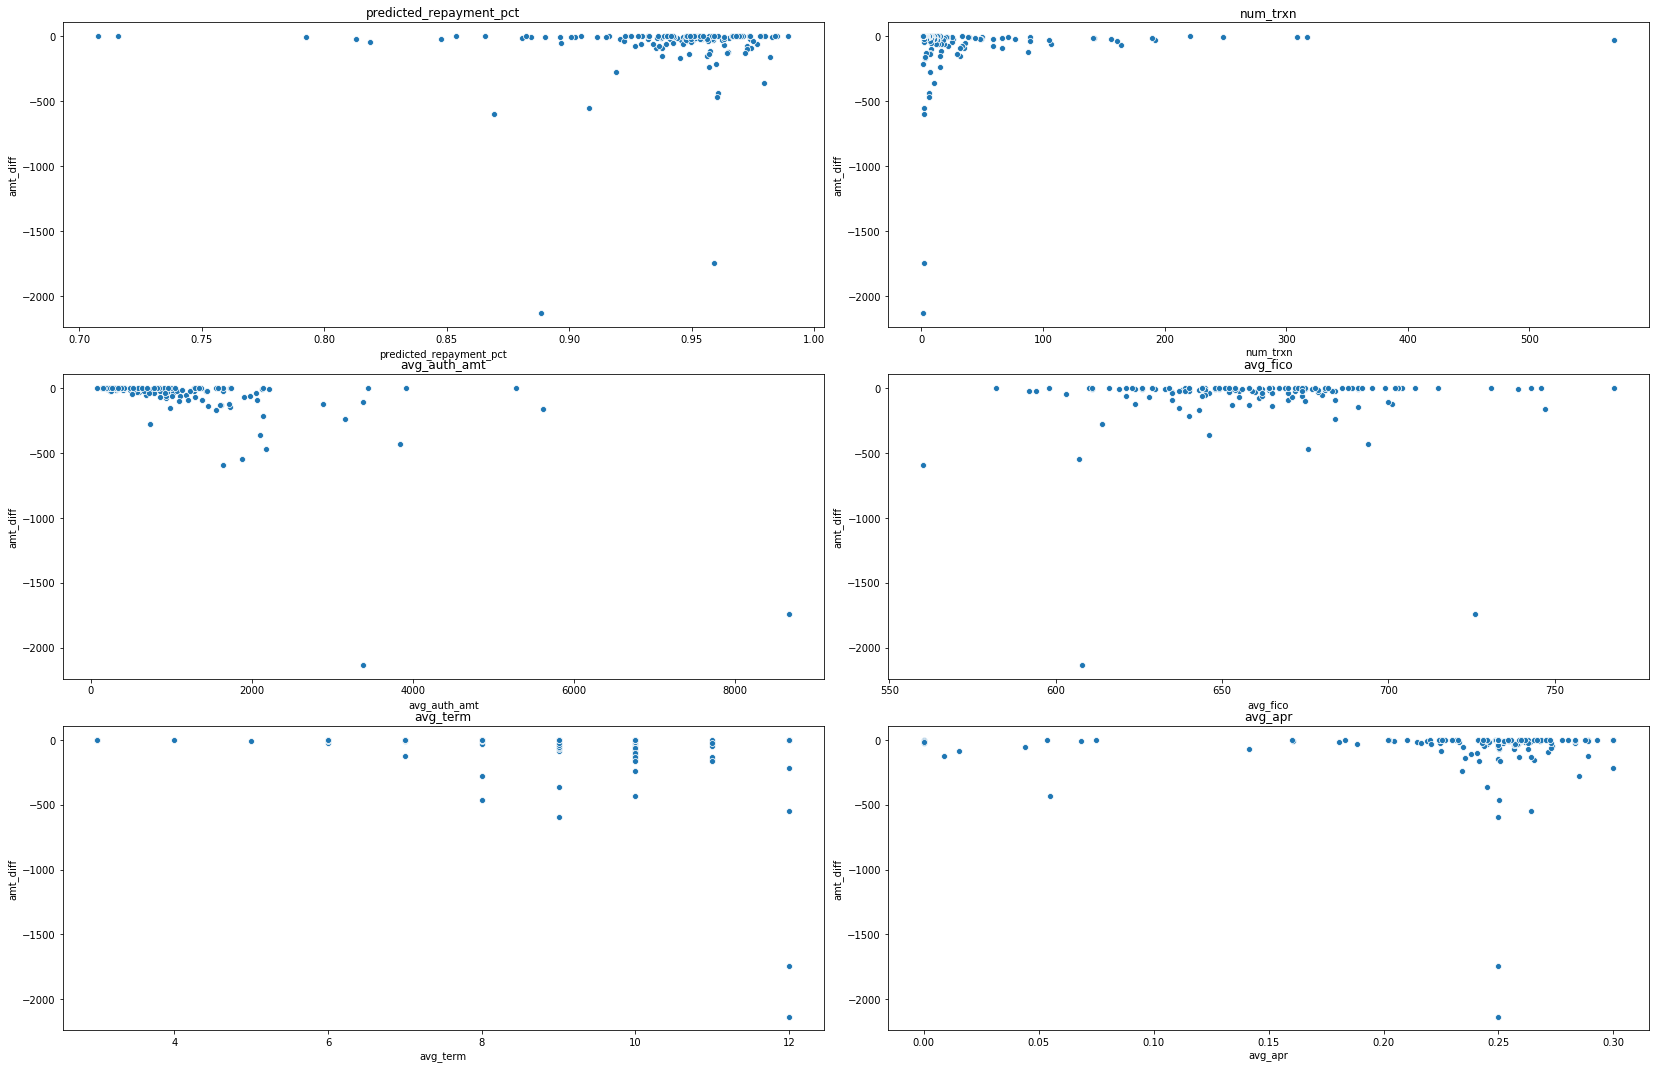

In [14]:
#just difference
#plot difference with respect to other features.
fig, axs = plt.subplots(3,2,figsize=(15, 10))
fig.tight_layout()
plt.subplots_adjust(bottom=0.1, right=1.5, top=1.5)
sns.scatterplot(x = 'predicted_repayment_pct', y = 'amt_diff', data = df_2, ax=axs[0,0]).set_title('predicted_repayment_pct')
sns.scatterplot(x = 'num_trxn', y = 'amt_diff', data = df_temp2, ax=axs[0,1]).set_title('num_trxn')
sns.scatterplot(x = 'avg_auth_amt', y = 'amt_diff', data = df_2, ax=axs[1,0]).set_title('avg_auth_amt')
sns.scatterplot(x = 'avg_fico', y = 'amt_diff', data = df_2, ax=axs[1,1]).set_title('avg_fico')
sns.scatterplot(x = 'avg_term', y = 'amt_diff', data = df_2, ax=axs[2,0]).set_title('avg_term')
sns.scatterplot(x = 'avg_apr', y = 'amt_diff', data = df_2, ax=axs[2,1]).set_title('avg_apr')

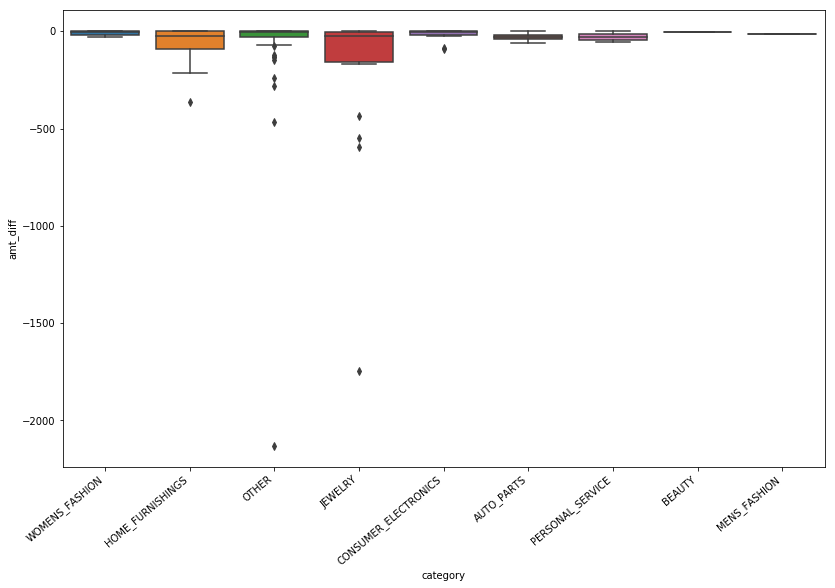

In [15]:
#boxplot with categories.
fig, ax = plt.subplots(figsize=(11.7, 8.27))
ax = sns.boxplot(x = 'category', y = 'amt_diff', data = df_2)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

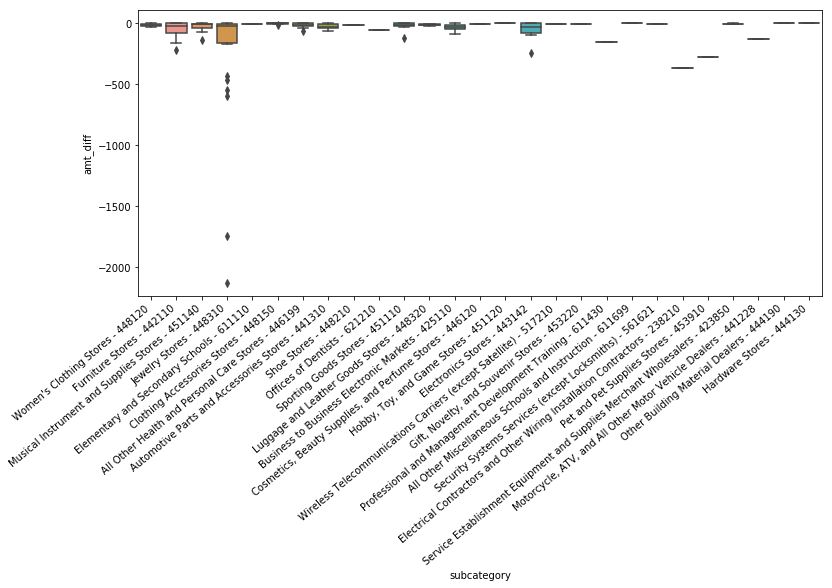

In [16]:
#box plot with subcategories.
fig, ax = plt.subplots(figsize=(11.7, 8.27))
ax = sns.boxplot(x = 'subcategory', y = 'amt_diff', data = df_2)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

In [17]:
#difference
#run regression to find what are the true source of the difference: FICO, avg_auth_amt, subcategory-jewelry.
#create dummies for subcategories
df_2_1 = pd.get_dummies(df_2,columns=['subcategory'])
#prepare OLS regression.
drops = ['category','name','actual_repayment_pct','merchant_id','avg_loan_amt','percentage_diff']
df_2_1 = df_2_1.drop(columns = drops) 
y2 = df_2['amt_diff']
X2 = df_2_1.drop(columns=['amt_diff'])
X2 = sm.add_constant(X2)
model = sm.OLS(y2,X2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               amt_diff   R-squared:                       0.512
Model:                            OLS   Adj. R-squared:                  0.364
Method:                 Least Squares   F-statistic:                     3.461
Date:                Wed, 10 Jul 2019   Prob (F-statistic):           6.10e-07
Time:                        12:58:51   Log-Likelihood:                -937.76
No. Observations:                 143   AIC:                             1944.
Df Residuals:                     109   BIC:                             2044.
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
==========================================================================================================================================================
                                                                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                  -1971.1304    559.169     -3.525      0.001   -3079.384    -862.876
predicted_repayment_pct                                                                  703.4694    458.066      1.536      0.128    -204.403    1611.342
num_trxn                                                                                  -0.0162      0.031     -0.515      0.607      -0.079       0.046
avg_auth_amt                                                                              -0.1612      0.019     -8.296      0.000      -0.200      -0.123
avg_fico                                                                                   2.2487      0.624      3.605      0.000       1.012       3.485
avg_term                                                                                   5.2479     10.589      0.496      0.621     -15.739      26.234
avg_apr                                                                                 -157.8794    286.305     -0.551      0.582    -725.327     409.568
subcategory_All Other Health and Personal Care Stores - 446199                           -47.8901     93.352     -0.513      0.609    -232.910     137.130
subcategory_All Other Miscellaneous Schools and Instruction - 611699                      77.0148    159.643      0.482      0.630    -239.392     393.422
subcategory_Automotive Parts and Accessories Stores - 441310                             -23.3589    109.554     -0.213      0.832    -240.491     193.773
subcategory_Business to Business Electronic Markets - 425110                             -79.8806    124.609     -0.641      0.523    -326.852     167.091
subcategory_Clothing Accessories Stores - 448150                                         -90.1554    111.716     -0.807      0.421    -311.574     131.263
subcategory_Cosmetics, Beauty Supplies, and Perfume Stores - 446120                      -37.5021    210.806     -0.178      0.859    -455.314     380.309
subcategory_Electrical Contractors and Other Wiring Installation Contractors - 238210   -202.0476    212.182     -0.952      0.343    -622.585     218.490
subcategory_Electronics Stores - 443142                                                  -99.7908    103.376     -0.965      0.337    -304.679     105.098
subcategory_Elementary and Secondary Schools - 611110                                     14.5918    210.908      0.069      0.945    -403.421     432.605
subcategory_Furniture Stores - 442110                                                    -36.2069     91.047     -0.398      0.692    -216

In [18]:
#percentage difference
#run regression to find what are the true source of the percentage difference: FICO, avg_auth_amt, subcategory-jewelry.
#create dummies for subcategories
df_2_2 = pd.get_dummies(df_2,columns=['subcategory'])
#prepare OLS regression.
drops = ['category','name','actual_repayment_pct','merchant_id','avg_loan_amt','amt_diff']
df_2_2 = df_2_2.drop(columns = drops) 
y2 = df_2['percentage_diff']
X2 = df_2_2.drop(columns=['percentage_diff'])
X2 = sm.add_constant(X2)
model = sm.OLS(y2,X2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        percentage_diff   R-squared:                       0.546
Model:                            OLS   Adj. R-squared:                  0.409
Method:                 Least Squares   F-statistic:                     3.974
Date:                Wed, 10 Jul 2019   Prob (F-statistic):           2.97e-08
Time:                        12:58:52   Log-Likelihood:                 217.90
No. Observations:                 143   AIC:                            -367.8
Df Residuals:                     109   BIC:                            -267.1
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
==========================================================================================================================================================
                                                                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                     -0.8376      0.173     -4.845      0.000      -1.180      -0.495
predicted_repayment_pct                                                                    0.1864      0.142      1.316      0.191      -0.094       0.467
num_trxn                                                                               -5.051e-06   9.74e-06     -0.519      0.605   -2.44e-05    1.42e-05
avg_auth_amt                                                                           -3.209e-05   6.01e-06     -5.342      0.000    -4.4e-05   -2.02e-05
avg_fico                                                                                   0.0011      0.000      5.619      0.000       0.001       0.001
avg_term                                                                                  -0.0012      0.003     -0.354      0.724      -0.008       0.005
avg_apr                                                                                   -0.0190      0.089     -0.215      0.830      -0.194       0.156
subcategory_All Other Health and Personal Care Stores - 446199                            -0.0258      0.029     -0.893      0.374      -0.083       0.031
subcategory_All Other Miscellaneous Schools and Instruction - 611699                      -0.0022      0.049     -0.045      0.964      -0.100       0.096
subcategory_Automotive Parts and Accessories Stores - 441310                              -0.0246      0.034     -0.726      0.469      -0.092       0.043
subcategory_Business to Business Electronic Markets - 425110                              -0.0400      0.039     -1.038      0.301      -0.116       0.036
subcategory_Clothing Accessories Stores - 448150                                          -0.0224      0.035     -0.649      0.518      -0.091       0.046
subcategory_Cosmetics, Beauty Supplies, and Perfume Stores - 446120                        0.0003      0.065      0.004      0.996      -0.129       0.129
subcategory_Electrical Contractors and Other Wiring Installation Contractors - 238210     -0.1348      0.066     -2.054      0.042      -0.265      -0.005
subcategory_Electronics Stores - 443142                                                   -0.0548      0.032     -1.714      0.089      -0.118       0.009
subcategory_Elementary and Secondary Schools - 611110                                      0.0155      0.065      0.237      0.813      -0.114       0.145
subcategory_Furniture Stores - 442110                                                     -0.0349      0.028     -1.240      0.217      -0

In [19]:
#use random forest to find features that have influence
from sklearn.ensemble import RandomForestRegressor
model_rf_2 = RandomForestRegressor(max_depth=3, random_state=0,n_estimators=100)
model_rf_2.fit(X2,y2)
#print(model_rf_2.feature_importances_)
print('Importance of avg_auth_amt is: %.3f'%(model_rf_2.feature_importances_[3]))
print('Importance of avg_fico is: %.3f'%(model_rf_2.feature_importances_[4]))
print('Importance of the merchant is in subcategory \'Jewelry Stores - 448310\' is: %.3f'%(model_rf_2.feature_importances_[20]))

[0.00000000e+00 2.81723236e-02 7.73431202e-02 2.44257912e-01
 4.05602173e-01 6.82471752e-03 1.36304692e-02 0.00000000e+00
 0.00000000e+00 8.30834954e-05 0.00000000e+00 0.00000000e+00
 0.00000000e+00 2.00788342e-02 1.45765028e-04 0.00000000e+00
 2.08065408e-03 0.00000000e+00 0.00000000e+00 0.00000000e+00
 4.54725556e-02 0.00000000e+00 1.16937772e-03 4.82373958e-05
 0.00000000e+00 0.00000000e+00 1.55090778e-01 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
Importance of avg_auth_amt is: 0.244
Importance of avg_fico is: 0.406
Importance of the merchant is in subcategory 'Jewelry Stores - 448310' is: 0.045


# Based on the data, in which areas would you increase or decrease volume?

In [20]:
#prepare regression to check overestimate and underestimate
#create dummies for subcategories.
df_1_1 = pd.get_dummies(df_1,columns=['subcategory'])
indicator_repay = [1 if df_1.iloc[i,12] >= 0 else 0 for i in range(df_1.shape[0])]
df_1_1['indicator_repay'] = indicator_repay
drops = ['category','name','repay_abs_diff','actual_repayment_pct','predicted_repayment_pct','merchant_id','avg_auth_amt']
df_1_1 = df_1_1.drop(columns = drops) 
#prepare for regression
y = df_1_1['indicator_repay']
X = df_1_1.drop(columns=['repay_diff','indicator_repay','indicator_repay'])
X = sm.add_constant(X)
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        indicator_repay   R-squared:                       0.355
Model:                            OLS   Adj. R-squared:                  0.167
Method:                 Least Squares   F-statistic:                     1.889
Date:                Wed, 10 Jul 2019   Prob (F-statistic):            0.00810
Time:                        12:58:55   Log-Likelihood:                -68.558
No. Observations:                 143   AIC:                             203.1
Df Residuals:                     110   BIC:                             300.9
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
==========================================================================================================================================================
                                                                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                     -2.2071      1.020     -2.164      0.033      -4.228      -0.186
num_trxn                                                                               -3.412e-05   7.18e-05     -0.475      0.636      -0.000       0.000
avg_loan_amt                                                                           -2.187e-05   5.05e-05     -0.433      0.666      -0.000    7.82e-05
avg_fico                                                                                   0.0044      0.001      3.053      0.003       0.002       0.007
avg_term                                                                                  -0.0171      0.024     -0.709      0.480      -0.065       0.031
avg_apr                                                                                    1.1925      0.652      1.829      0.070      -0.100       2.485
subcategory_All Other Health and Personal Care Stores - 446199                            -0.6412      0.211     -3.033      0.003      -1.060      -0.222
subcategory_All Other Miscellaneous Schools and Instruction - 611699                      -0.4280      0.364     -1.174      0.243      -1.150       0.294
subcategory_Automotive Parts and Accessories Stores - 441310                              -0.4606      0.250     -1.843      0.068      -0.956       0.035
subcategory_Business to Business Electronic Markets - 425110                               0.0207      0.284      0.073      0.942      -0.543       0.584
subcategory_Clothing Accessories Stores - 448150                                           0.0341      0.255      0.134      0.894      -0.470       0.539
subcategory_Cosmetics, Beauty Supplies, and Perfume Stores - 446120                       -0.6785      0.481     -1.411      0.161      -1.632       0.274
subcategory_Electrical Contractors and Other Wiring Installation Contractors - 238210      0.2611      0.481      0.543      0.589      -0.693       1.215
subcategory_Electronics Stores - 443142                                                   -0.2098      0.235     -0.891      0.375      -0.676       0.257
subcategory_Elementary and Secondary Schools - 611110                                      0.3454      0.480      0.720      0.473      -0.605       1.296
subcategory_Furniture Stores - 442110                                                     -0.0481      0.207     -0.232      0.817      -0.459       0.363
subcategory_Gift, Novelty, and Souvenir Stores - 453220                                   -0.9560      0.483     -1.981      0.050      -1

In [21]:
#Use random forest to see which feature is affectting the overestimation.
from sklearn.ensemble import RandomForestRegressor
model_rf = RandomForestRegressor(max_depth = 3, random_state=0,n_estimators=100)
model_rf.fit(X,y)
#print(model_rf.feature_importances_)
print('Importance of num_trxn is: %.3f'%(model_rf.feature_importances_[1]))
print('Importance of avg_fico is: %.3f'%(model_rf.feature_importances_[3]))
print('Importance of the merchant is in subcategory \'All Other Health and Personal Care Stores - 446199\' is: %.3f'%(model_rf.feature_importances_[7]))

Importance of num_trxn is: 0.373
Importance of avg_fico is: 0.174
Importance of the merchant is in subcategory 'All Other Health and Personal Care Stores - 446199' is: 0.003


### Analysis
The main purpose of the company is to maximize profit. When the predicted repayment rate is lower than the actual repayment rate it is possible that the company misses potential revenue due to underestimation, and approves smaller loan amounts than optimal. On the other hand, when the predicted repayment rate is higher than the actual repayment rate, the company risks loan defaults. Therefore, we need to avoid both overestimation and underestimation on the repayment.
In order to find the overestimation and underestimation, I create a dummy variable that is equal to 1 when actual repayment rate is higher than predicted repayment rate and 0 otherwise. I perform a regression of this dummy variable on number of transactions, average loan amount (highly correlated with average requested amount so I pick one of them), average fico score, average loan term, average APR, and subcategory fixed effects (subcategory with NaN is treated as baseline). Regression results indicate that certain features have statistically significant regression coefficients. 
From the regression we can conclude that if a merchant is in the subcategory of 'All Other Health and Personal Care Stores' the likelihood of actual repayment rate outperforming predicted repayment rate drastically drops, controlling for all other factors, such as average FICO score, etc. Since the actual repayment rate is very rarely exactly equal to the predicted rate, this can be alternatively interpreted as being in the abovementioned subcategory increases the likelihood of a lower actual repayment rate than predicted. Hence, it is suggested that Company XYZ decrease average loan amount, or take extra-precaution when making loans to subcategory ‘All Other Health and Personal Care Stores’.  
Subcategory ‘Women’s Clothing Store’, while having a similar negative effect on the likelihood of positive repayment rate difference, is the most profitable category, as demonstrated in question 4, primarily due to its higher number of transactions. Thus, with this category Company XYZ should take precaution towards lending without shrinking the overall volume, possibly with requiring more frequently down payments. 
Also, based on the significance of the coefficients, a high Fico score is a good indicator of high actual repayment rate; the predicted repayment rate could perhaps be adjusted to better reflect this factor, and the company can adjust the approved loans accordingly. 
I also ran a random forest on the same dataset to see which features will be most important to determine an overprediction. The result shows me that number of transactions has 37.3% importance and average FICO score has 17.4% importance. Therefore, when certain merchants have small number of transactions we may not want to provide loans as generously. 
From the second question, the result from category ‘Jewelry’ is also worth examining. The company tends to approve smaller loan amounts than requested by borrowers. However, from the first question we can see that the actual repayment rate of jewelry is higher than what we predicted (2.3% higher on average) and has a variance of 4.38e-03 which is relatively small. Also, from the next question we can see that jewelry is the third most profitable category for Company XYZ. Hence, it is recommended that the company can reasonably increase the volume of loan made in this category.



# Which categories generate the most profit for Company XYZ?

In [26]:
# Calculate the profit. revenue from interest subtract cost.
df_4 = df_all.iloc[:,0:df_all.shape[1]]
df_4['interest'] = df_4['avg_apr']/12*df_4['avg_term']
df_4['profit'] = df_4['interest']*df_4['avg_loan_amt']*df_4['num_trxn']*df_4['actual_repayment_pct']-df_4['avg_loan_amt']*df_4['num_trxn']*(1-df_4['actual_repayment_pct'])*0.25
#take sum
temp_1 = df_4.groupby(['category']).sum().sort_values(by = 'profit', ascending = False)
temp_1['profit percentage'] = temp_1['profit']/temp_1['profit'].sum()
print(temp_1[['profit','profit percentage']])
#take average
temp_2 = df_4.groupby(['category']).mean().sort_values(by = 'profit', ascending = False)
#temp_2['profit percentage'] = temp_2['profit']/temp_2['profit'].sum()
print(temp_2[['profit']])


                             profit  profit percentage
category                                              
WOMENS_FASHION        451831.159883           0.498312
OTHER                 237301.071836           0.261713
JEWELRY                72581.513488           0.080048
HOME_FURNISHINGS       62751.427081           0.069207
CONSUMER_ELECTRONICS   37243.248680           0.041075
PERSONAL_SERVICE       22334.918835           0.024633
AUTO_PARTS             21953.032824           0.024211
BEAUTY                   549.026440           0.000606
MENS_FASHION             177.149176           0.000195
                            profit
category                          
WOMENS_FASHION        56478.894985
PERSONAL_SERVICE      11167.459418
AUTO_PARTS             4390.606565
JEWELRY                3456.262547
CONSUMER_ELECTRONICS   3385.749880
OTHER                  3342.268617
HOME_FURNISHINGS       2988.163194
BEAUTY                  549.026440
MENS_FASHION            177.149176


In order to calculate the profit of the Company, I first calculate earnings from interest from APR and the length of the loan, then multiply the interest, average loan amount, number of loans per merchant and the actual repayment rate to obtain the revenue for each merchant from Company XYZ. Also we need to subtract the cost that we are not able to get. I made an assumption that Company XYZ is using a debt collector company, and the debt collector company charged 25% of the total amount they get back. I group the dataset by category. I then calculate the profit in two ways: 

First, I sum up all profit within the same category.
Women's fashion leads the board and obtains nearly 50 percent of the total profit. Moreover, I notice that jewelry is the category that has the third highest profit.

Second, I take the mean of profit per merchant within the same category; some categories may have more observed profit simply due to the sheer number of merchants, and taking an average allows me to see the actual profit per merchant.
It is not surprising that women's fashion is again at the top of the list. 

# What information can Company XYZ gather to further evaluate their merchants’ profit?

Features that may be helpful in predicting repayment %: 

1. Average age group: 

People at some ages tend to have higher repayment abilities, better personal financing knowledge and better sense of obligation. If a merchant's customers are mainly under 18 then these customers may potentially have a higher possibility of failing to make timely payments by themselves. 

2. Average percentage of male/female/etc.:

From the given data, we can see that there is a significant difference in profit between merchants with different target genders. More detailed data can help us break this down for merchants without only being able to refer to the generalized category/subcategory. 

3. Average customer geographical resident location:

Different cities, depending on their characteristics, such as size, rural/urban, etc., may have different population composition and consequently different average income, wealth, financial habit. Borrowers from certain cities may have higher chance to repay. 

4. Number of purchases on different period of the month/year:

Purchases made before the end of the year may have a higher prepayment rate since customer’s bonus empower them to pay the loan earlier. 

5. Prepayment percentage:

Merchants with higher average prepayment percentage could be a sign for higher repayment likelihood among customers, ceteris paribus.

6. Percentage of returning borrowers and their average past total loan amounts:

High percentage of returning borrowers could be a signal for higher average repayment rates.  


# What types of analysis, evaluation, or diligence should Company XYZ do?

The three main sources through which Company XYZ make and guarantee profit are the total number of merchants using its service, the total number of borrowers/the total volume of loans, and the repayment rate on its loans. We can start the analysis from these three perspectives. 
1. People who need money actually find Company XYZ's service simple and useful.

    With information about people's click rate, and conversion rate from browsing the website to making a purchase, and from making a purchase to borrowing from Company XYZ, we can analyze how efficient is Company XYZ's embedded borrowing interface, or advertisements are. These analyses including design A/B testing can see how users will behave on new features, and will these features bring a higher click rate, impression time and conversion rate.
    
2. People who borrow money from Company XYZ are able to pay their loans.

   In addition to ensuring that those who access a merchant’s website borrows from Company XYZ, the company also needs to ensure that an accurate predicted repayment rate, such as down payments, interest rates and loan amounts are appropriately designed to maximize profit from each transaction. This includes the above analyses, in particular Q1, and constant updates of a repayment rate predictor function such that it accurately reflects the actual repayment rate.
   
3. Finding more merchants whose customers are likely to need loan and are able to pay loan. 

    Some merchants tend to have customers with good integrity and greater financing abilities, who are also more likely to use the service of Company XYZ. With the correct merchants, Company XYZ may attract more credible customers. Analyses to achieve this are similar to the above, and include sourcing information of customer characteristics for certain merchants, or tracing certain customers to identify correct merchants. 
